# Import libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import squarify


# Import data

In [123]:
transactions = pd.read_csv('/Users/phungtran/Library/Mobile Documents/com~apple~CloudDocs/Documents/Learning/Data_science/DL07_graduation/project1/ML_graduation_projects/Du_lieu_cung_cap/Transactions.csv')
products = pd.read_csv('/Users/phungtran/Library/Mobile Documents/com~apple~CloudDocs/Documents/Learning/Data_science/DL07_graduation/project1/ML_graduation_projects/Du_lieu_cung_cap/Products_with_Categories.csv')

In [124]:
print('Transaction table')
print(transactions.info())
print(f'\nProducts table')
print(products.info())

Transaction table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Member_number  38765 non-null  int64 
 1   Date           38765 non-null  object
 2   productId      38765 non-null  int64 
 3   items          38765 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ MB
None

Products table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productId    167 non-null    int64  
 1   productName  167 non-null    object 
 2   price        167 non-null    float64
 3   Category     167 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.3+ KB
None


In [125]:
print('Transaction table')
print(transactions.head())
print(f'\nProducts table')
print(products.head())

Transaction table
   Member_number        Date  productId  items
0           1808  21-07-2015          1      3
1           2552  05-01-2015          2      1
2           2300  19-09-2015          3      3
3           1187  12-12-2015          4      3
4           3037  01-02-2015          2      1

Products table
   productId       productName  price         Category
0          1    tropical fruit    7.8       Fresh Food
1          2        whole milk    1.8            Dairy
2          3         pip fruit    3.0       Fresh Food
3          4  other vegetables    0.8       Fresh Food
4          5        rolls/buns    1.2  Bakery & Sweets


# Clean data

In [126]:
# check null values
print('Transaction table')
print(transactions.isnull().sum())
print(f'\nProducts table')
print(products.isnull().sum())

Transaction table
Member_number    0
Date             0
productId        0
items            0
dtype: int64

Products table
productId      0
productName    0
price          0
Category       0
dtype: int64


In [127]:
# check duplicated values
print('Transaction table')
print(transactions.duplicated().sum())
print(f'\nProducts table')
print(products.duplicated().sum())

Transaction table
244

Products table
0


In [128]:
# drop duplicated values
transactions.drop_duplicates(inplace=True)

In [129]:
# convert to date
string_to_date = lambda x : datetime.strptime(x, "%d-%m-%Y").date()
transactions['Date'] = transactions['Date'].apply(string_to_date)
transactions['Date'] = transactions['Date'].astype('datetime64[ns]')

In [130]:
# convert member to string
df['Member_number'] = df['Member_number'].astype(str)

# Merge 2 datasets

In [131]:
df = pd.merge(transactions, products, left_on='productId', right_on='productId')
df.head()

,Member_number,Date,productId,items,productName,price,Category
0,1808,2015-07-21,1,3,tropical fruit,7.8,Fresh Food
1,2552,2015-01-05,2,1,whole milk,1.8,Dairy
2,2300,2015-09-19,3,3,pip fruit,3.0,Fresh Food
3,1187,2015-12-12,4,3,other vegetables,0.8,Fresh Food
4,3037,2015-02-01,2,1,whole milk,1.8,Dairy


In [132]:
print(f"Transactions are from {df['Date'].min()} to {df['Date'].max()}")
print(f"Number of unique products: {df['productId'].nunique()}")
print(f"Number of unique members: {df['Member_number'].nunique()}")


Transactions are from 2014-01-01 00:00:00 to 2015-12-30 00:00:00
Number of unique products: 167
Number of unique members: 3898


In [133]:
df['sales'] = df['items'] * df['price']

# Data exploration

## Overview

In [134]:
df[['items','price','sales']].describe()

,items,price,sales
count,38521.000000,38521.000000,38521.000000
mean,1.996729,4.305367,8.590893
std,0.817539,4.320088,9.952770
min,1.000000,0.300000,0.300000
25%,1.000000,1.250000,2.400000
50%,2.000000,2.500000,5.200000
75%,3.000000,6.100000,10.500000
max,3.000000,28.500000,85.500000


In [135]:
df[['items','price','sales']].corr()

,items,price,sales
items,1.000000,-0.001630,0.353591
price,-0.001630,1.000000,0.864539
sales,0.353591,0.864539,1.000000


In [136]:
df['month_start'] = df['Date'].dt.to_period('M').dt.to_timestamp()

In [137]:
items_monthly = df.groupby('month_start').agg({'items':'sum'})
sales_monthly = df.groupby('month_start').agg({'sales':'sum'})

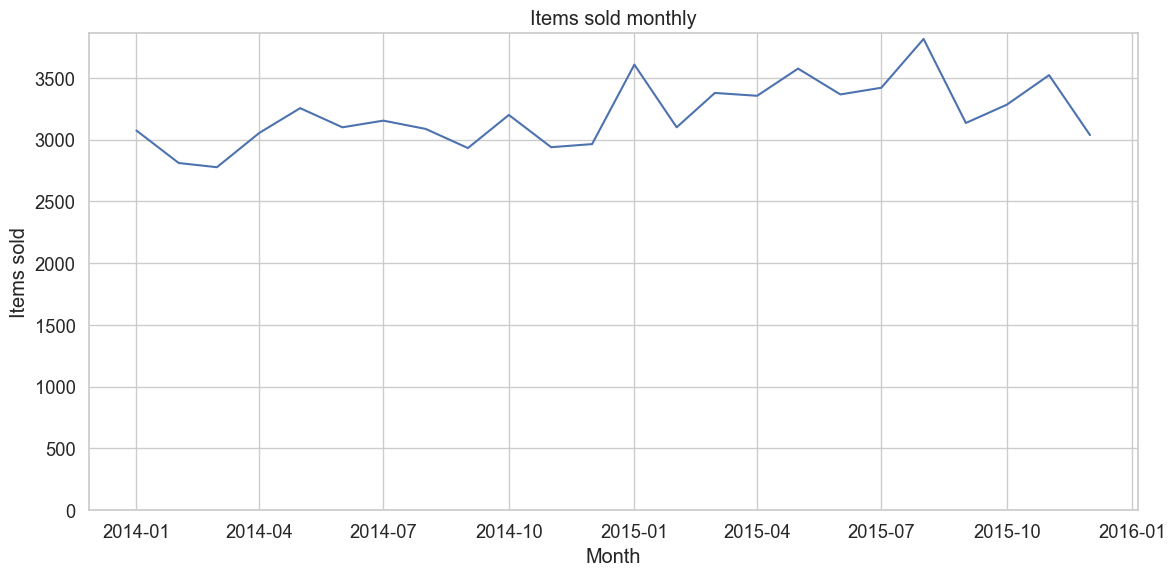

In [187]:
plt.figure(figsize=(12,6))
sns.lineplot(data=items_monthly, y = 'items', x ='month_start')
plt.title('Items sold monthly')
plt.xlabel('Month')
plt.ylabel('Items sold')
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

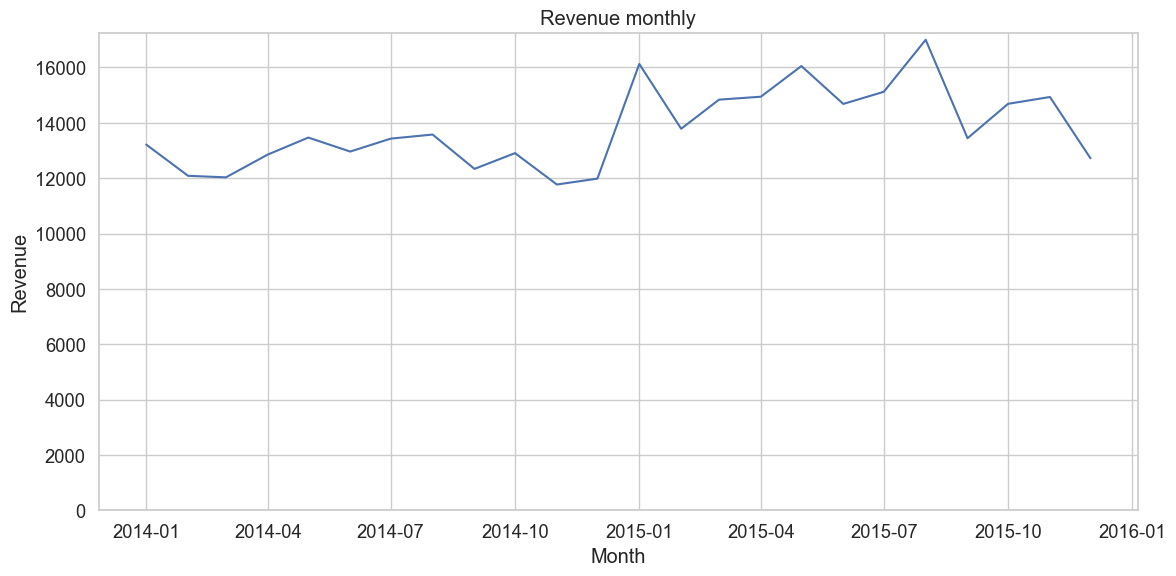

In [188]:
plt.figure(figsize=(12,6))
sns.lineplot(data=sales_monthly, y = 'sales', x ='month_start')
plt.title('Revenue monthly')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

Highest revenue in Jan 2015 & July 2015

In [184]:
# Get top 10 products by items sold per month
top_10_monthly = (
    df.groupby(['month_start', 'productName'])[['items', 'sales']]
    .sum()
    .reset_index()
    .sort_values(['month_start', 'items'], ascending = [True, False])
)
top_10_monthly = top_10_monthly.groupby('month_start').head(10)
top_10_monthly.head(5)

,month_start,productName,items,sales
103,2014-01-01,rolls/buns,172,206.4
136,2014-01-01,whole milk,166,298.8
86,2014-01-01,other vegetables,131,104.8
116,2014-01-01,soda,125,100.0
137,2014-01-01,yogurt,91,200.2


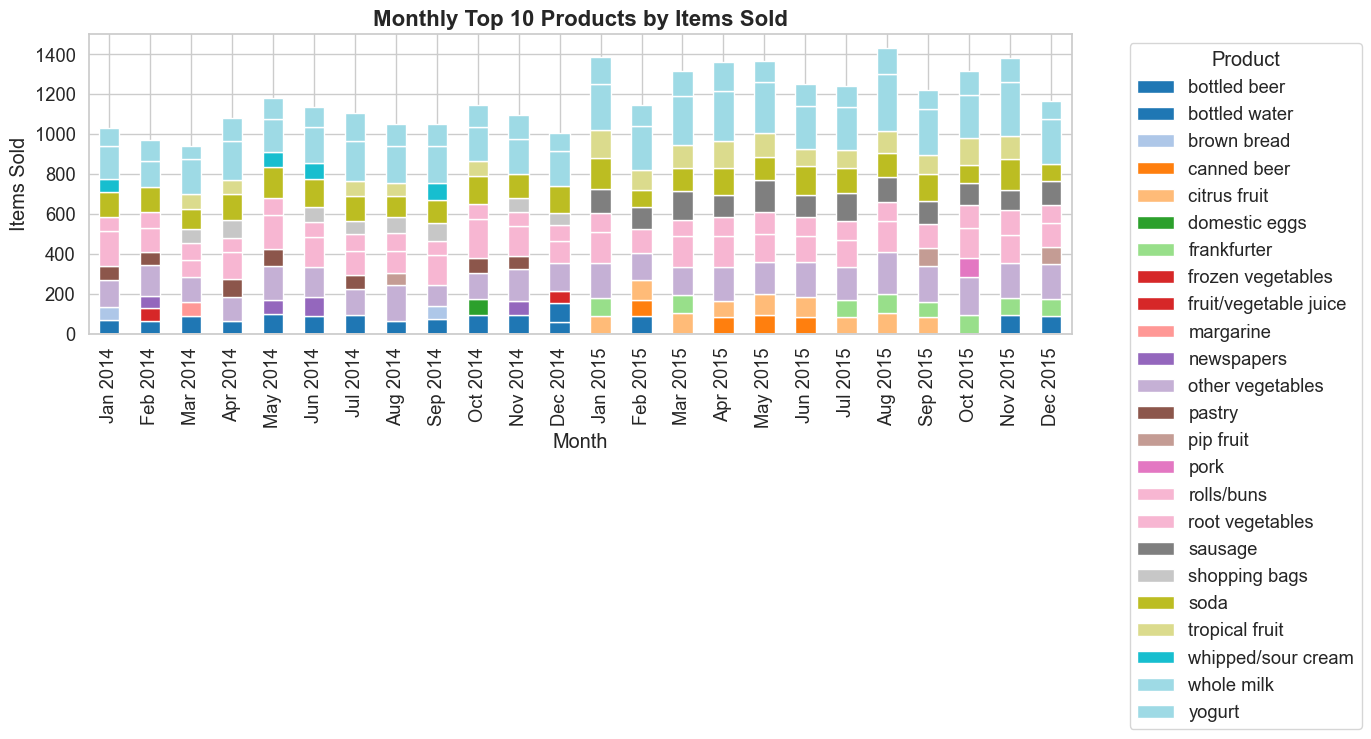

In [185]:

stacked_df = top_10_monthly.pivot(index='month_start', columns='productName', values='items').fillna(0)

#format the month for readibility
stacked_df.index = stacked_df.index.strftime('%b %Y')

stacked_df.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')

plt.title('Monthly Top 10 Products by Items Sold', fontsize=16, weight='bold')
plt.xlabel('Month')
plt.ylabel('Items Sold')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


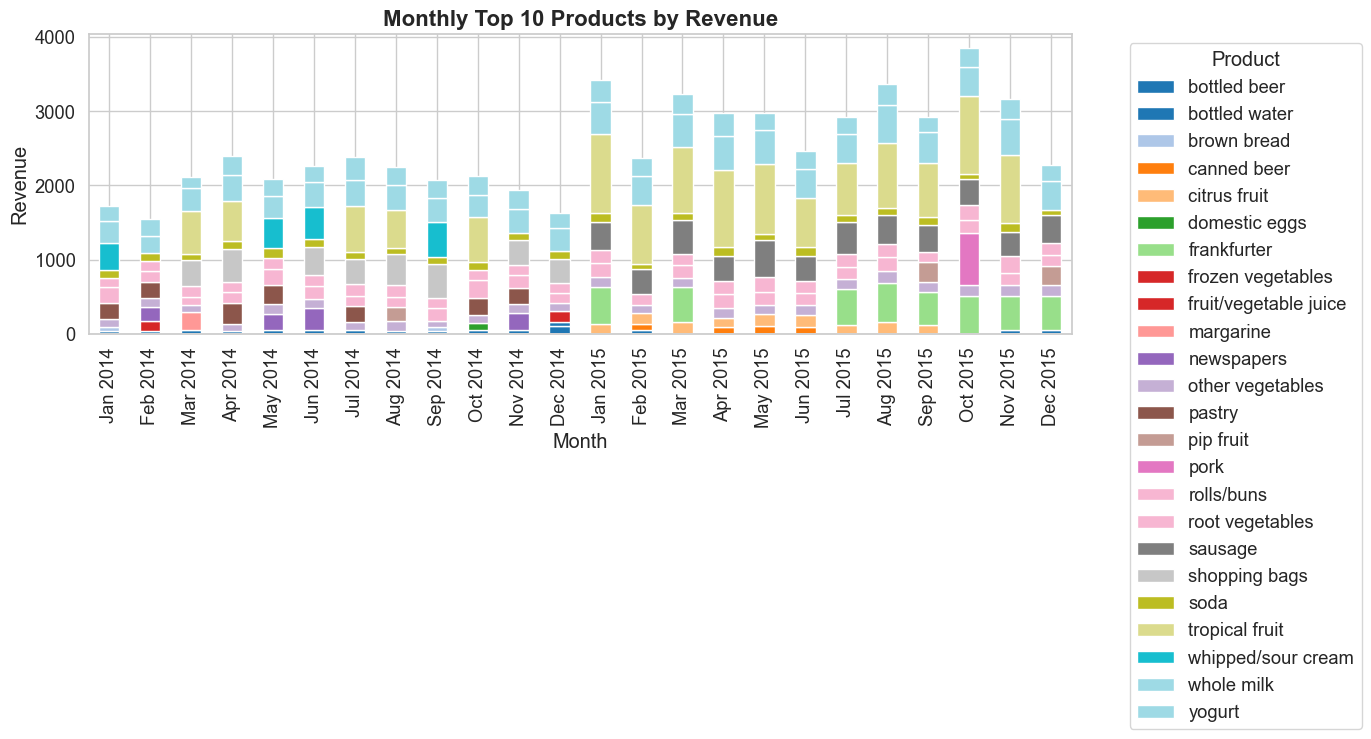

In [186]:

stacked_df = top_10_monthly.pivot(index='month_start', columns='productName', values='sales').fillna(0)

#format the month for readibility
stacked_df.index = stacked_df.index.strftime('%b %Y')

stacked_df.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')

plt.title('Monthly Top 10 Products by Revenue', fontsize=16, weight='bold')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [189]:
# Get top 10 products by items sold per month
top_10_cat_monthly = (
    df.groupby(['month_start', 'Category'])[['items', 'sales']]
    .sum()
    .reset_index()
    .sort_values(['month_start', 'items'], ascending = [True, False])
)
top_10_cat_monthly = top_10_cat_monthly.groupby('month_start').head(10)
top_10_cat_monthly.head(5)

,month_start,Category,items,sales
3,2014-01-01,Fresh Food,685,3506.70
2,2014-01-01,Dairy,598,2465.64
0,2014-01-01,Bakery & Sweets,585,1918.56
1,2014-01-01,Beverages,460,1472.40
5,2014-01-01,Household & Hygiene,220,1787.20


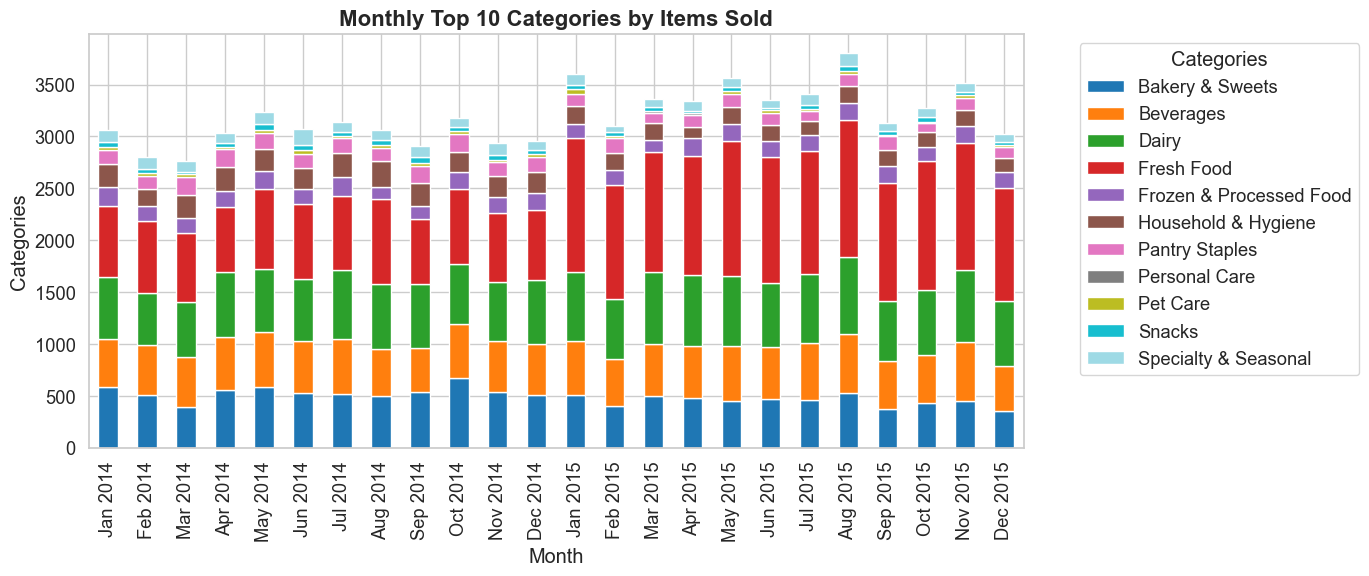

In [191]:

stacked_df = top_10_cat_monthly.pivot(index='month_start', columns='Category', values='items').fillna(0)

#format the month for readibility
stacked_df.index = stacked_df.index.strftime('%b %Y')

stacked_df.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')

plt.title('Monthly Top 10 Categories by Items Sold', fontsize=16, weight='bold')
plt.xlabel('Month')
plt.ylabel('Categories')
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


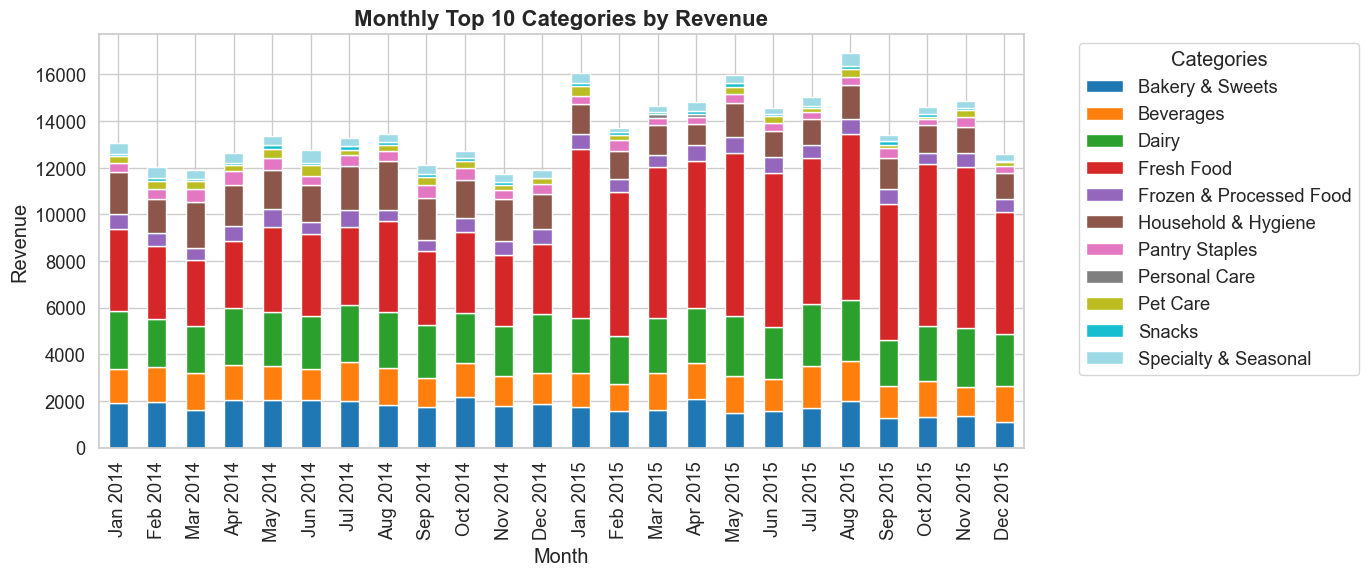

In [193]:

stacked_df = top_10_cat_monthly.pivot(index='month_start', columns='Category', values='sales').fillna(0)

#format the month for readibility
stacked_df.index = stacked_df.index.strftime('%b %Y')

stacked_df.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')

plt.title('Monthly Top 10 Categories by Revenue', fontsize=16, weight='bold')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Category Level

In [140]:
top_cat_sold = df.groupby('Category').agg(
            {'items': 'sum'}).sort_values(by = 'items', ascending=False).head(10)
top_cat_revenue = df.groupby('Category').agg(
            {'sales': 'sum'}).sort_values(by = 'sales', ascending=False).head(10)
avg_cat_price = df.groupby('Category').agg(
            {'price': 'mean'}).sort_values(by = 'price', ascending=False).head(10)

In [141]:
def bar_h(df,x,y, title, xlabel, ylabel):
    plt.figure(figsize=(12,6))
    sns.barplot(data=df, x = x, y =y, palette='crest')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

/var/folders/83/8kx9n5vn35j3wwksdcw8t5qm0000gn/T/ipykernel_5967/1899888832.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




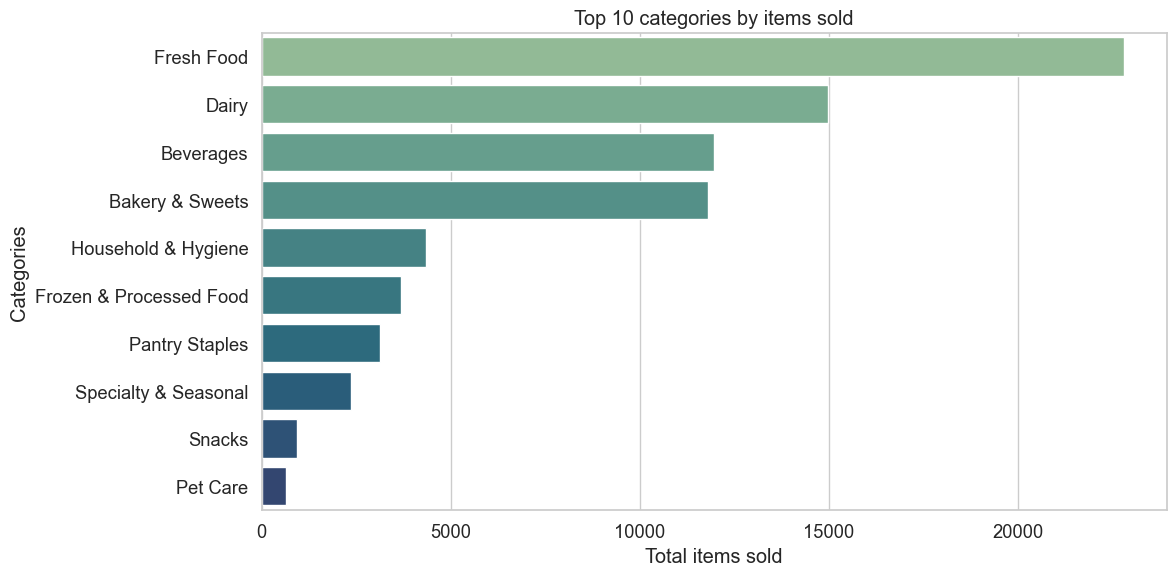

/var/folders/83/8kx9n5vn35j3wwksdcw8t5qm0000gn/T/ipykernel_5967/1899888832.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




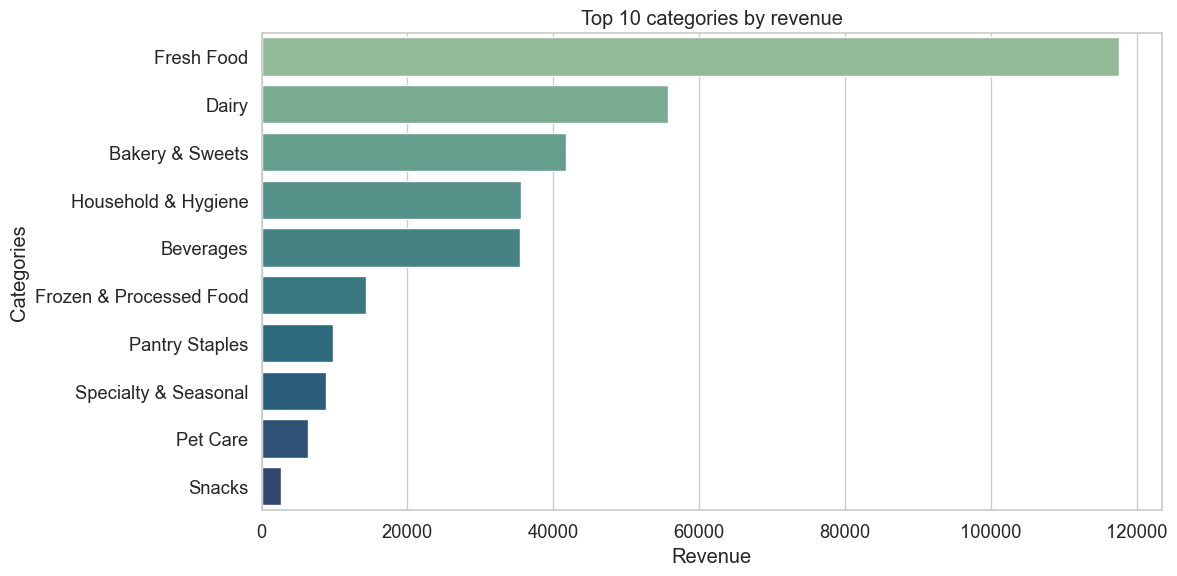

/var/folders/83/8kx9n5vn35j3wwksdcw8t5qm0000gn/T/ipykernel_5967/1899888832.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




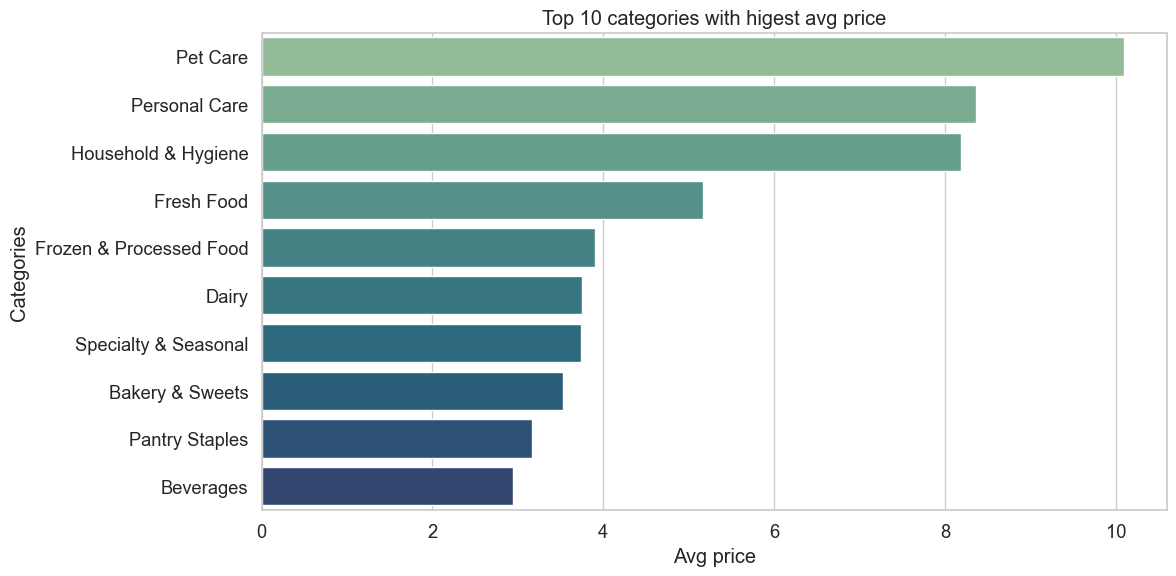

In [142]:
bar_h(top_cat_sold, 'items', 'Category','Top 10 categories by items sold', 'Total items sold', 'Categories' )
bar_h(top_cat_revenue, 'sales', 'Category','Top 10 categories by revenue', 'Revenue', 'Categories' )
bar_h(avg_cat_price, 'price', 'Category','Top 10 categories with higest avg price', 'Avg price', 'Categories' )

## Product Level

In [143]:
## Top products sold & revenue

top_products_sold = df.groupby('productName').agg(
            {'items': 'sum'}).sort_values(by = 'items', ascending=False).head(10)
top_products_revenue = df.groupby('productName').agg(
            {'sales': 'sum'}).sort_values(by = 'sales', ascending=False).head(10)
top_products_price = df.groupby('productName').agg(
            {'price': 'mean'}).sort_values(by = 'price', ascending=False).head(10)

/var/folders/83/8kx9n5vn35j3wwksdcw8t5qm0000gn/T/ipykernel_5967/1899888832.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




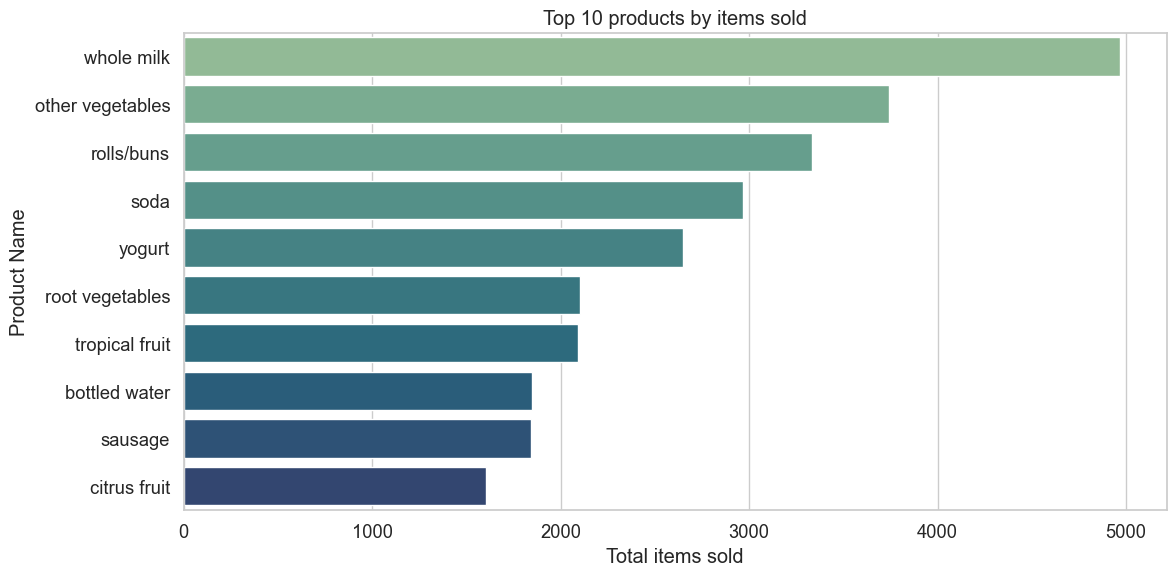

/var/folders/83/8kx9n5vn35j3wwksdcw8t5qm0000gn/T/ipykernel_5967/1899888832.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




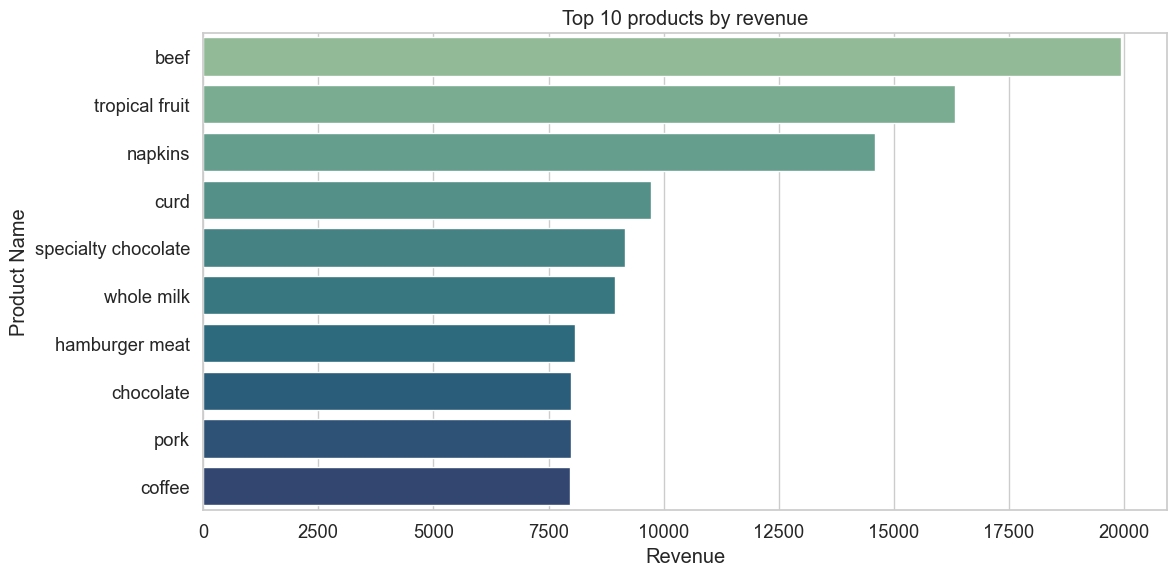

/var/folders/83/8kx9n5vn35j3wwksdcw8t5qm0000gn/T/ipykernel_5967/1899888832.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




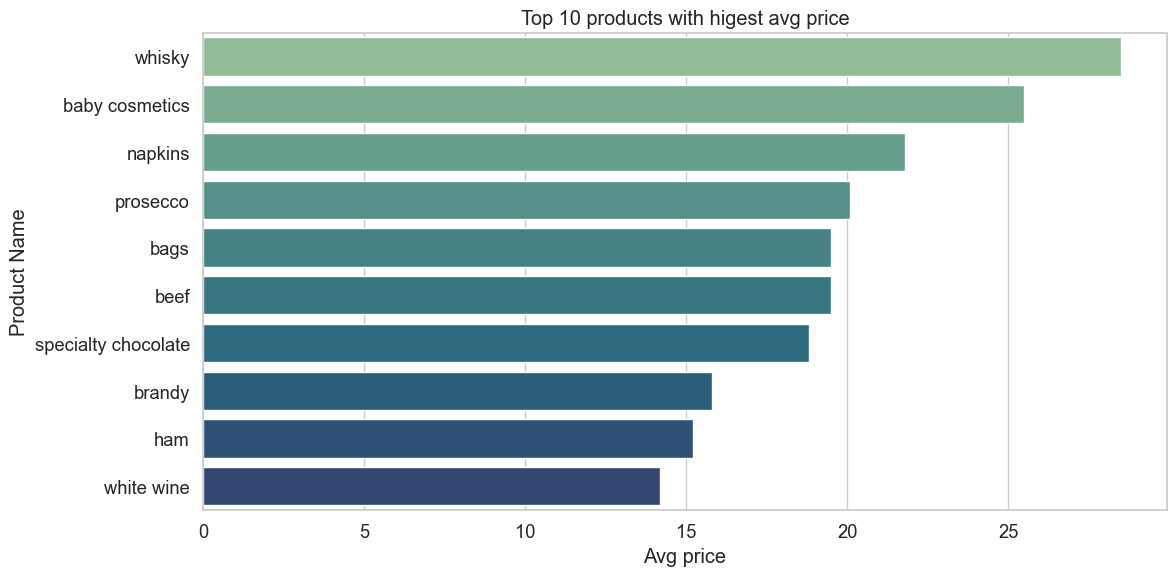

In [144]:
bar_h(top_products_sold, 'items', 'productName','Top 10 products by items sold', 'Total items sold', 'Product Name' )
bar_h(top_products_revenue, 'sales', 'productName','Top 10 products by revenue', 'Revenue', 'Product Name' )
bar_h(top_products_price, 'price', 'productName','Top 10 products with higest avg price', 'Avg price', 'Product Name' )

## Customer Level

In [145]:
top_customer_sold = df.groupby('Member_number').agg(
            {'items': 'sum'}).sort_values(by = 'items', ascending=False).reset_index().head(10)
top_customer_revenue = df.groupby('Member_number').agg(
            {'sales': 'sum'}).sort_values(by = 'sales', ascending=False).reset_index().head(10)
avg_customer_price = df.groupby('Member_number').agg(
            {'price': 'mean'}).sort_values(by = 'price', ascending=False).reset_index().head(10)

In [168]:
top_customer_sold['Member_number'] = top_customer_sold['Member_number'].astype(str)
top_customer_revenue['Member_number'] = top_customer_revenue['Member_number'].astype(str)
avg_customer_price['Member_number'] = top_customer_revenue['Member_number'].astype(str)

/var/folders/83/8kx9n5vn35j3wwksdcw8t5qm0000gn/T/ipykernel_5967/1899888832.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




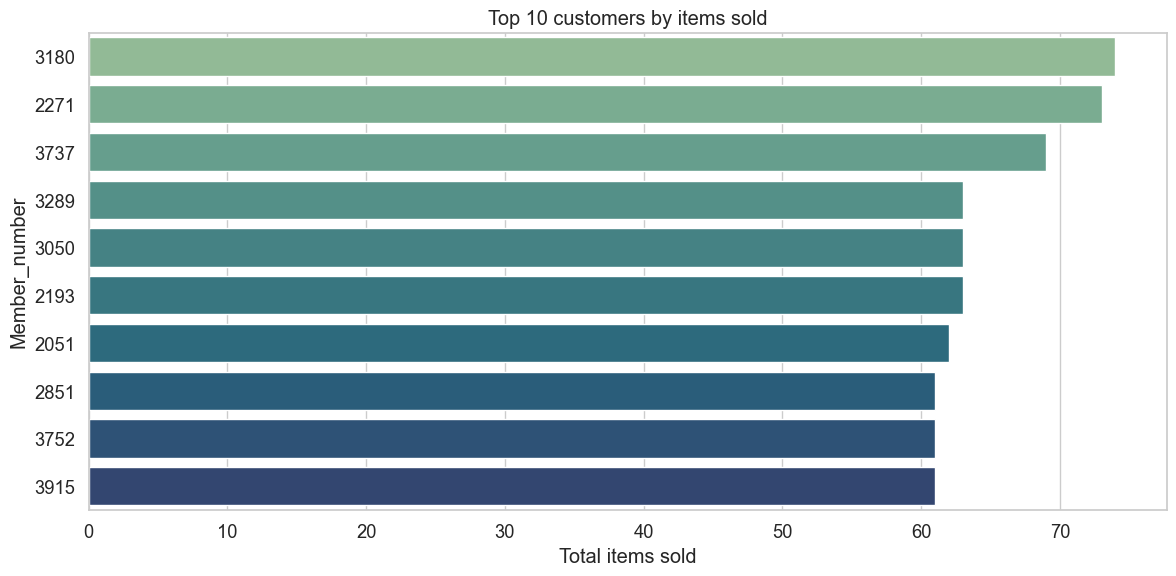

/var/folders/83/8kx9n5vn35j3wwksdcw8t5qm0000gn/T/ipykernel_5967/1899888832.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




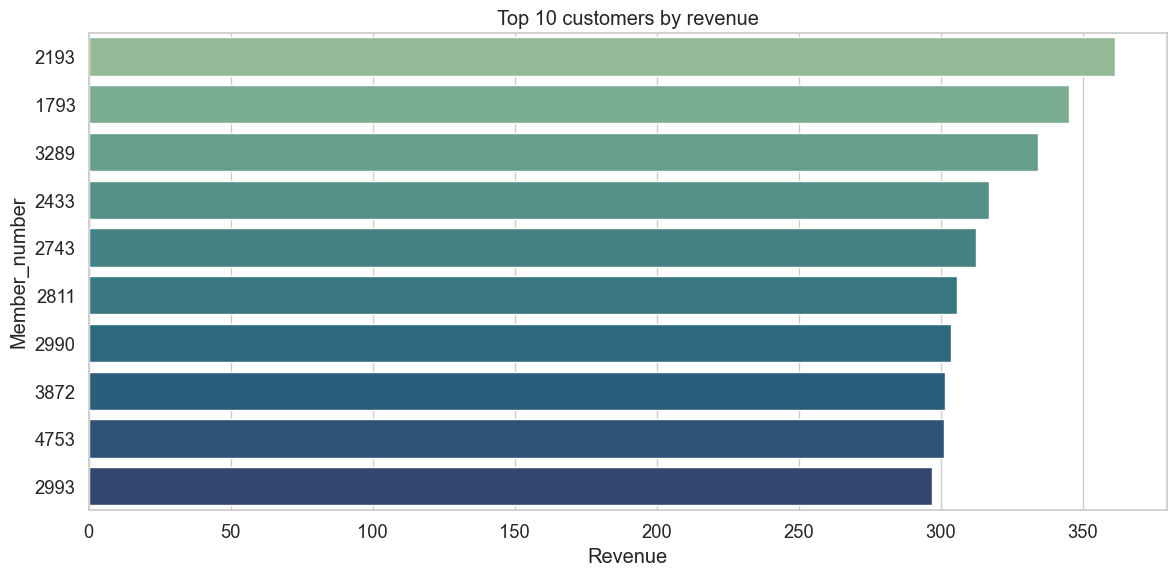

/var/folders/83/8kx9n5vn35j3wwksdcw8t5qm0000gn/T/ipykernel_5967/1899888832.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




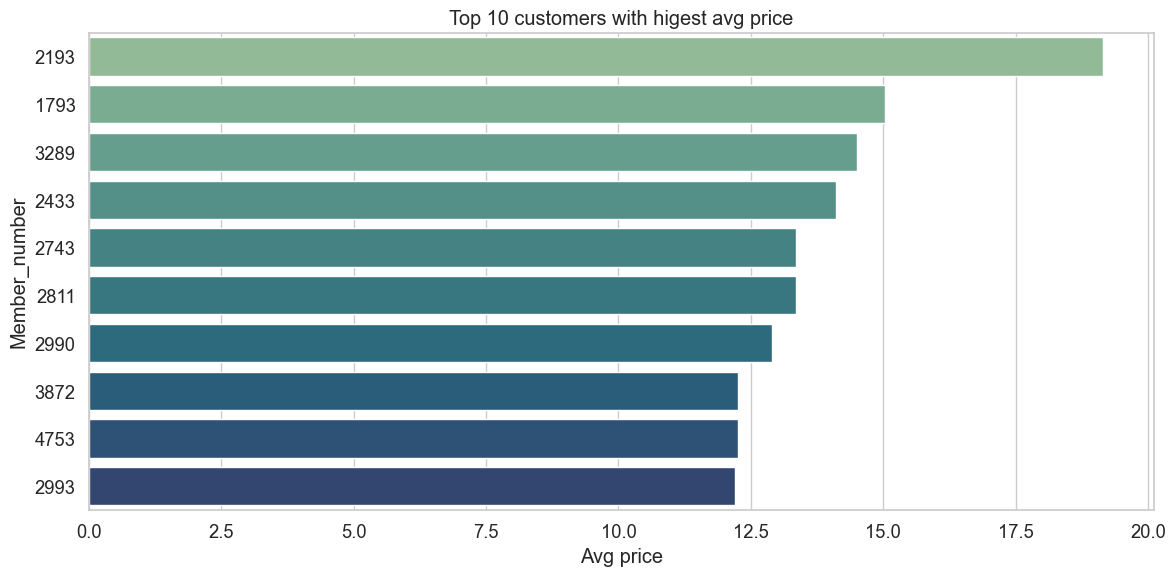

In [169]:
bar_h(top_customer_sold, 'items', 'Member_number','Top 10 customers by items sold', 'Total items sold', 'Member_number' )
bar_h(top_customer_revenue, 'sales', 'Member_number','Top 10 customers by revenue', 'Revenue', 'Member_number' )
bar_h(avg_customer_price, 'price', 'Member_number','Top 10 customers with higest avg price', 'Avg price', 'Member_number' )

# Calculate RFM

In [147]:
max_date = df['Date'].max()

Recency = lambda x : (max_date - x.max()).days
Frequency  = lambda x: len(x.unique())
Monetary = lambda x : round(sum(x), 2)


df_RFM = df.groupby('Member_number').agg({'Date': Recency,
                                        'productId': Frequency,
                                        'sales': Monetary })

# Rename the columns of DataFrame
df_RFM.columns = ['Recency', 'Frequency', 'Monetary']
# Descending Sorting
df_RFM = df_RFM.sort_values('Monetary', ascending=False)

df_RFM.head()                                      

,Recency,Frequency,Monetary
Member_number,,,
2193,91,21,361.45
1793,26,19,345.10
3289,4,21,334.15
2433,3,24,316.81
2743,142,15,312.46


In [148]:
df_RFM.shape

(3898, 3)

In [149]:
df_RFM.reset_index().to_csv('df_RFM.csv')

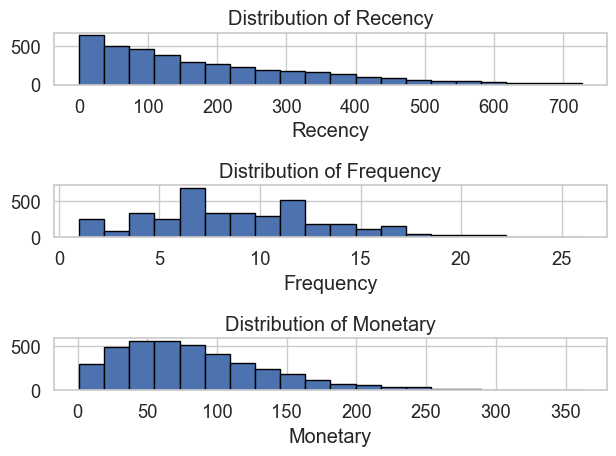

In [150]:
# Vẽ phân phối của 'Recency'
plt.subplot(3, 1, 1) # 3 hàng, 1 cột, vị trí thứ nhất
plt.hist(df_RFM['Recency'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Recency')
plt.xlabel('Recency')

# Vẽ phân phối của 'Frequency'
plt.subplot(3, 1, 2) # 3 hàng, 1 cột, vị trí thứ hai
plt.hist(df_RFM['Frequency'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3) # 3 hàng, 1 cột, vị trí thứ ba
plt.hist(df_RFM['Monetary'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

In [151]:
# Create labels for Recency, Frequency, Monetary
r_labels = range(4, 0, -1) 
f_labels = range(1, 5)
m_labels = range(1, 5)

In [152]:
# Assign these labels to 4 equal percentile groups
r_groups = pd.qcut(df_RFM['Recency'].rank(method='first'), q=4, labels=r_labels)

f_groups = pd.qcut(df_RFM['Frequency'].rank(method='first'), q=4, labels=f_labels)

m_groups = pd.qcut(df_RFM['Monetary'].rank(method='first'), q=4, labels=m_labels)

In [153]:
df_RFM = df_RFM.assign(R = r_groups.values, F = f_groups.values,  M = m_groups.values)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M
Member_number,,,,,,
2193,91,21,361.45,3,4,4
1793,26,19,345.10,4,4,4
3289,4,21,334.15,4,4,4
2433,3,24,316.81,4,4,4
2743,142,15,312.46,2,4,4


In [154]:
def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))
df_RFM['RFM_Segment'] = df_RFM.apply(join_rfm, axis=1)

In [155]:
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment
Member_number,,,,,,,
2193,91,21,361.45,3,4,4,344
1793,26,19,345.10,4,4,4,444
3289,4,21,334.15,4,4,4,444
2433,3,24,316.81,4,4,4,444
2743,142,15,312.46,2,4,4,244


In [156]:
rfm_count_unique = df_RFM.groupby('RFM_Segment')['RFM_Segment'].nunique()
print(rfm_count_unique.sum())

60


# Manual Segmentation

In [157]:
# Calculate RFM_Score
df_RFM['RFM_Score'] = df_RFM[['R','F','M']].sum(axis=1)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
Member_number,,,,,,,,
2193,91,21,361.45,3,4,4,344,11
1793,26,19,345.10,4,4,4,444,12
3289,4,21,334.15,4,4,4,444,12
2433,3,24,316.81,4,4,4,444,12
2743,142,15,312.46,2,4,4,244,10


In [158]:
df_RFM['RFM_Score'].unique()

array([11, 12, 10,  9,  8,  7,  6,  5,  4,  3])

In [159]:
def rfm_level(df):
    # Check for special 'STARS' and 'NEW' conditions first
    if df['RFM_Score'] == 12:
        return 'STARS'
    elif df['R'] == 4 and df['F'] == 1 and df['M'] == 1:
        return 'NEW'
    # Then check for other conditions
    elif df['M'] == 4:
        return 'BIG SPENDER'
    elif df['F'] == 4:
        return 'LOYAL'
    elif df['R'] == 4:
        return 'ACTIVE'
    elif df['R'] == 1:
        return 'LOST'
    elif df['M'] == 1:
        return 'LIGHT'
    else:
        return 'REGULARS'

In [160]:
# Create a new column RFM_Level
df_RFM['RFM_Level'] = df_RFM.apply(rfm_level, axis=1)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
Member_number,,,,,,,,,
2193,91,21,361.45,3,4,4,344,11,BIG SPENDER
1793,26,19,345.10,4,4,4,444,12,STARS
3289,4,21,334.15,4,4,4,444,12,STARS
2433,3,24,316.81,4,4,4,444,12,STARS
2743,142,15,312.46,2,4,4,244,10,BIG SPENDER


In [161]:
df_RFM['RFM_Level'].value_counts()

RFM_Level
REGULARS       875
LOST           875
BIG SPENDER    689
ACTIVE         414
LIGHT          388
LOYAL          301
STARS          286
NEW             70
Name: count, dtype: int64

In [162]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg = df_RFM.groupby('RFM_Level').agg({
    'Recency': 'median',
    'Frequency': 'median',
    'Monetary': ['median', 'count']}).round(0)

rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_agg['Percent'] = round((rfm_agg['Count']/rfm_agg.Count.sum())*100, 2)

# Reset the index
rfm_agg = rfm_agg.reset_index()

In [163]:
rfm_agg

,RFM_Level,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,ACTIVE,30.0,8.0,71.0,414,10.62
1,BIG SPENDER,128.0,13.0,146.0,689,17.68
2,LIGHT,157.0,5.0,29.0,388,9.95
3,LOST,399.0,5.0,41.0,875,22.45
4,LOYAL,85.0,13.0,96.0,301,7.72
5,NEW,16.0,4.0,23.0,70,1.80
6,REGULARS,145.0,8.0,71.0,875,22.45
7,STARS,30.0,15.0,161.0,286,7.34


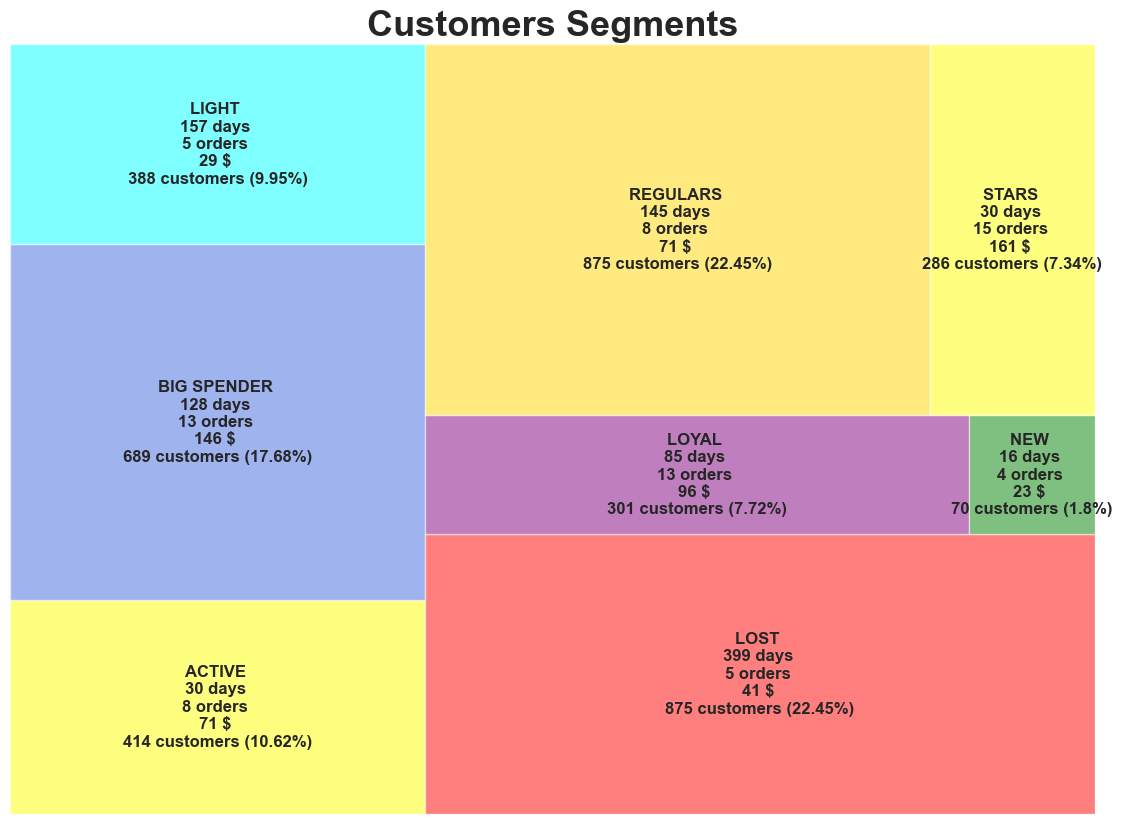

In [164]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict = {'ACTIVE':'yellow','BIG SPENDER':'royalblue', 'LIGHT':'cyan',
               'LOST':'red', 'LOYAL':'purple', 'NEW':'green', 'STARS':'gold'}

squarify.plot(sizes=rfm_agg['Count'],
              text_kwargs={'fontsize':12,'weight':'bold', 'fontname':"sans serif"},
              color=colors_dict.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg.iloc[i])
                      for i in range(0, len(rfm_agg))], alpha=0.5 )


plt.title("Customers Segments",fontsize=26,fontweight="bold")
plt.axis('off')

plt.savefig('RFM Segments.png')
plt.show()

In [165]:
import plotly.express as px

fig = px.scatter(rfm_agg, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="RFM_Level",
           hover_name="RFM_Level", size_max = 60) 
fig.show()